In [ ]:
%matplotlib inline
#some basic imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

#TODO: add your imports here


#seting up some styles
import seaborn as sns
sns.set_context("paper")
sns.set_style("whitegrid")

#avoid Font-problem in plots for ACM/IEEE papers
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42


# imports the slr module to parse the data (read the readme for to install the dependencies)
import sys
import os
    
from pyslr import ACMSerach, Format


In [103]:
def plotSerachProfile(data,title=""):
    fig = plt.figure(figsize=(13,12))
    gs = fig.add_gridspec(ncols=2, nrows=2)
    fig.suptitle(title)

    #plot dates
    ax = fig.add_subplot(gs[0, 0])
    years = data.groupby("year")["id"].count()
    years = years.reset_index("year").rename(columns={"id":"count"})
    ax.bar(x='year',height='count',data=years)
    ax.set_title("publication distribution")

    #plot types
    ax = fig.add_subplot(gs[0, 1])
    types = data.groupby("type")["id"].count()
    types = types.reset_index("type").rename(columns={"id":"count"})
    ax.bar(x='type',height='count',data=types)
    ax.set_title("type distribution")

    #plot venues
    ax = fig.add_subplot(gs[1, 0])
    confs = data.groupby("series")["id"].count()
    confs = confs.reset_index("series").rename(columns={"id":"count"})
    confs = confs[confs["count"] > 2]
    ax.bar(x='series',height='count',data=confs)
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_title("Venues with more than 2 Publications")

    #plot authors
    ax = fig.add_subplot(gs[1, 1])
    auth = data.copy()
    auth["first_author"] = auth['authors'].apply(lambda x:x[0][0])
    auth = auth.groupby("first_author")['id'].count()
    auth = auth.reset_index("first_author").rename(columns={"id":"count"})
    auth = auth[auth["count"] >= 2]
    ax.bar(x='first_author',height='count',data=auth)
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_title("1st Authors with more than 2 Publications")
    
    #plt.tight_layout()

In [105]:
def acmSerachAndLoad(query,resultFile):
    serach = ACMSerach()
    slr = Format()
    results = serach.search_raw(query)
    slr = Format()
    with open(resultFile,"w") as f:
        writer = slr.openWriter(f)
        for r in results:
            slr.addRow(r)
    
    return slr.readAsPanda(resultFile)


In [ ]:
q01 = 'Abstract:("serverless data analytics") OR (Abastract("serverless") AND Abstract("data processing"))'

In [ ]:
q01_data = acmSerachAndLoad(q01,"results/q01_acm.csv")

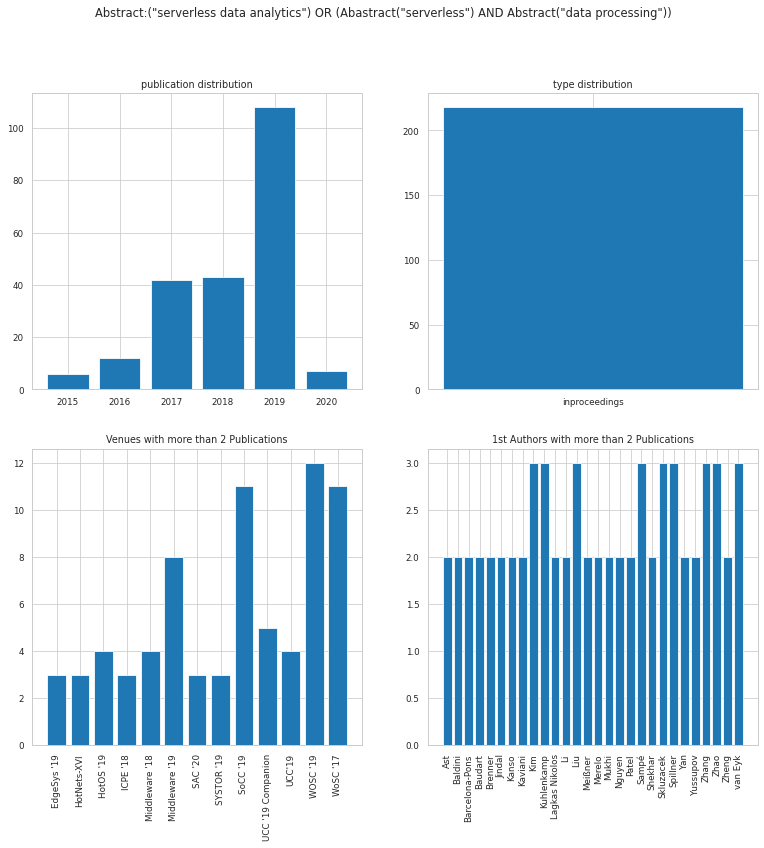

In [104]:
plotSerachProfile(q01_data,q01)